# Taller 2

1. Cree una función en Python que a partir de un conjunto de $n + 1$ datos, calcule el polinomio
de interpolación de Newton de grado $n$. Grafique el polinomio de interpolación junto con lo
datos experimetales aportados en el archivo "Datos Taller 2.txt" en el rango $[0, 6]$.

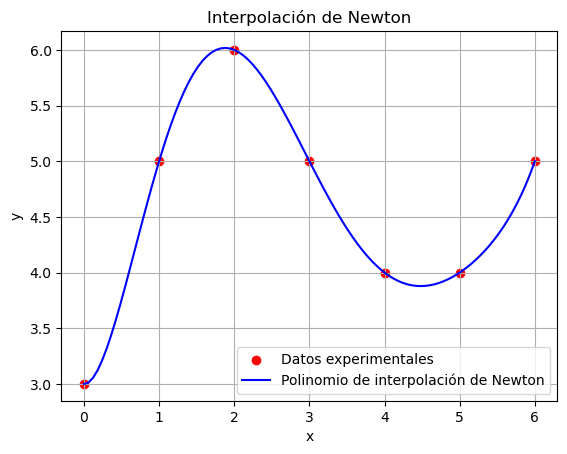

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def newton_divided_differences(x, y):
    """ Calcula las diferencias divididas de Newton."""
    n = len(x)
    coef = np.copy(y).astype(float)
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coef[i] = (coef[i] - coef[i - 1]) / (x[i] - x[i - j])
    return coef

def newton_polynomial(x_data, coef, x):
    """ Evalúa el polinomio de interpolación de Newton en x."""
    n = len(x_data)
    result = coef[-1]
    for i in range(n - 2, -1, -1):
        result = result * (x - x_data[i]) + coef[i]
    return result

# Cargar los datos
x_data = np.array([0, 1, 2, 3, 4, 5, 6], dtype=float)
y_data = np.array([3, 5, 6, 5, 4, 4, 5], dtype=float)

# Calcular coeficientes del polinomio de Newton
coef = newton_divided_differences(x_data, y_data)

# Puntos para la evaluación del polinomio
x_vals = np.linspace(0, 6, 100)
y_vals = newton_polynomial(x_data, coef, x_vals)

# Graficar
plt.scatter(x_data, y_data, color='red', label='Datos experimentales')
plt.plot(x_vals, y_vals, label='Polinomio de interpolación de Newton', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolación de Newton')
plt.grid()
plt.show()

2. Cree una función en Python que a partir de un conjunto de $n + 1$ datos, calcule el polinomio
de interpolación de Lagrange de grado $n$. Grafique el polinomio de interpolación junto con lo
datos experimetales aportados en el archivo "Datos Taller 2.txt" en el rango $[0, 6]$.

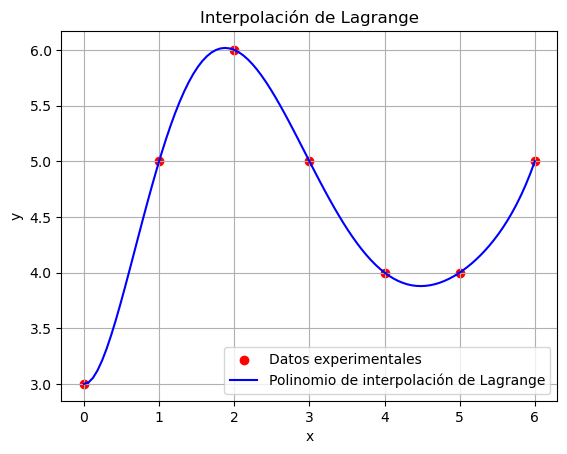

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_basis(x, x_data, k):
    """ Calcula la base de Lagrange L_k(x). """
    basis = 1
    for i in range(len(x_data)):
        if i != k:
            basis *= (x - x_data[i]) / (x_data[k] - x_data[i])
    return basis

def lagrange_interpolation(x_data, y_data, x):
    """ Calcula el polinomio de interpolación de Lagrange en x. """
    n = len(x_data)
    result = 0
    for k in range(n):
        result += y_data[k] * lagrange_basis(x, x_data, k)
    return result

# Cargar los datos
x_data = np.array([0, 1, 2, 3, 4, 5, 6], dtype=float)
y_data = np.array([3, 5, 6, 5, 4, 4, 5], dtype=float)

# Puntos para la evaluación del polinomio
x_vals = np.linspace(0, 6, 100)
y_vals = [lagrange_interpolation(x_data, y_data, x) for x in x_vals]

# Graficar
plt.scatter(x_data, y_data, color='red', label='Datos experimentales')
plt.plot(x_vals, y_vals, label='Polinomio de interpolación de Lagrange', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolación de Lagrange')
plt.grid()
plt.show()

3. Cree una función en Python que a partir de un conjunto de $n + 1$ datos, calcule el polinomio
de interpolación a través de splines cúbicos. Grafique el polinomio de interpolación junto con
lo datos experimetales aportados en el archivo "Datos Taller 2.txt" en el rango $[0, 6]$.

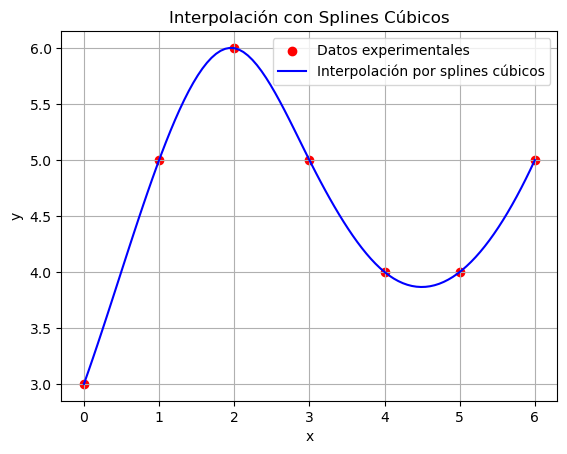

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Cargar los datos
x_data = np.array([0, 1, 2, 3, 4, 5, 6], dtype=float)
y_data = np.array([3, 5, 6, 5, 4, 4, 5], dtype=float)

# Crear el spline cúbico
spline = CubicSpline(x_data, y_data)

# Puntos para la evaluación del spline
x_vals = np.linspace(0, 6, 100)
y_vals = spline(x_vals)

# Graficar
plt.scatter(x_data, y_data, color='red', label='Datos experimentales')
plt.plot(x_vals, y_vals, label='Interpolación por splines cúbicos', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolación con Splines Cúbicos')
plt.grid()
plt.show()